<a href="https://colab.research.google.com/github/ismael-almazan/PNL/blob/main/Ejercicio_de_preprocesamiento_y_normalizaci%C3%B3n_de_texto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Maestría en Inteligencia Artificial y Analítica de Datos<h1>
<h2>Procesamiento de Lenguaje Natural<h2>
<h3>Estudiante: Ismael Almazan Luna<h3>
Fecha : 22 de febrero de 2025

**Actividad**: Preparar los datos textuales para que puedan ser analizados o utilizados de manera más eficiente por algoritmos de procesamiento de lenguaje natural (PLN) o modelos de aprendizaje automático

Realizar lo siguiente en un script de Python:
Genere un script en Python donde aplique las técnicas de preprocesamiento y normalización de texto al dataset indicado (archivo tuits_cambio_climatico.csv) para mostrar en una gráﬁca de barras las primeras 20 palabras con mayor frecuencia y mostrar una nube de palabras. No muestre palabras que no aporten algún sentido a los tuits, muestre solo palabras relevantes. Para implementar el script Utilice funciones. El texto de los tuits está almacenado en la columna llamada ‘tuit’ del dataset. Para leer los tuits utiliza/investiga la librería Pandas.


In [23]:
#LIBRERIAS
import pandas as pd
import re
import matplotlib.pyplot as plt
import nltk
import os

!python -m spacy download es_core_news_sm
import spacy

!pip install unidecode
import unicodedata
import unidecode

!pip install wordsegment
from wordsegment import load, segment

!pip install  emoji
import emoji
from collections import Counter

import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 37.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [24]:
#CONECTAR A GOOGLE DRIVE PARA CARGAR LOS DATOS
from google.colab import drive
drive.mount('/content/drive')

#Cargar los datos de csv

df = pd.read_csv('/content/drive/MyDrive/ClassFiles/PNL/tuits_cambio_climatico.csv')
#Comprobar que se hayan cargado los datos
display(df.head(8))

#Copia de Df
df0 = df.copy()

df['originales']=df['tuit']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,tuit
0,Excelente iniciativa de el uso de energías ren...
1,Inspirador que la contaminación plástica afect...
2,Datos muestran que los niveles de CO2 disminuy...
3,Indignante que las temperaturas globales sigan...
4,Inspirador que la deforestación continúe 🌊 #So...
5,Investigación revela que la deforestación cont...
6,Me alegra que las temperaturas globales sigan ...
7,Inaceptable que las temperaturas globales siga...


# Normalizacion y Limpieza de Ruido

1.   Convertir todo el texto a minisculas
2.   Utilizando expresiones regulares tratar los hashtags, menciones,  caracteeres especiales, acentos y numeros.
3.  Convertir emojis a texto

Se crearan dos listas de tuis, una que no contenga hashtags, menciones, y emojis(convertido a texto), y otra que contenga estos elemento ya normalizados para comparar la diferencia de ambos procesos de limpieza o preprocesamiento.



In [25]:
#------------TUITS ELIMINANDO MENCIONES, EMOJIS Y HASHTAGS---------------
# 1. Conversion del texto a minusculas
df['tuit'] = df['tuit'].str.lower()

# 2 y 3. Quitar  hashtags, emojis,menciones , numeros, espacios en blanco, acentos y caracteres especiales
df['tuit'] = df['tuit'].apply(lambda x: re.sub(r'#\S+', '', x))  #Para los hastags
df['tuit']  = df['tuit'].apply(lambda x: re.sub(r'[^\w\s]', '', x))  #Para los caracteres (inluye emois, ya que se componen de caracteres especials)
df['tuit'] = df['tuit'].apply(lambda x: re.sub(r'\d+', '', x))  #Para los numeros
df['tuit'] = df['tuit'].apply(lambda x: re.sub(r'\s+', ' ', x))  #Para los espacios en blanco

df['tuit'] = df['tuit'].apply(lambda x: unidecode.unidecode(str(x)))   #Quitar acentos

print('TUIS SIN HASTAGS NI EMOJIS')
display(df.head(8))



##------------TUITS CONSERVANDO MENCIONES, EMOJIS Y HASHTAGS---------------
# 1. Conversion del texto a minusculas
df0['tuit'] = df0['tuit'].str.lower()

# 2 y 3. Quitar  hashtags, emojis,menciones , numeros, espacios en blanco y caracteres especiales
df['tuit'] = df['tuit'].apply(lambda x: re.sub(r'\s+', ' ', x))  #Para los espacios en blanco

# Comproar que existan menciones, hashtags y numeros
print("Menciones: ", re.findall(r'@\w+', ' '.join(df0['tuit'])))  #NO hay menciones en los tuis
print("\n Hashtags: ", re.findall(r'#\w+', ' '.join(df0['tuit'])))  #Comprobar que existen #
print("\n Numeros: ", re.findall(r'\d+', ' '.join(df0['tuit'])))   #Solo aparece el numero 2 en repetidas ocaciones por la palabra CO2, por lo que no eliminaran los numeros)



#Quitar acentos pero solo a palabras para no efectar los emojis
  # Diccionario de acentos
acentos = {'á': 'a', 'é': 'e', 'í': 'i', 'ó': 'o', 'ú': 'u'}

  # Aplicar el reemplazo
for acento, limpio in acentos.items():
    df0['tuit'] = df0['tuit'].str.replace(acento, limpio, regex=False)

print('\n TUIS CON EMOGIS Y HASTAGS')
display(df0.head(8))




TUIS SIN HASTAGS NI EMOJIS


,tuit,originales
0,excelente iniciativa de el uso de energias ren...,Excelente iniciativa de el uso de energías ren...
1,inspirador que la contaminacion plastica afect...,Inspirador que la contaminación plástica afect...
2,datos muestran que los niveles de co disminuyan,Datos muestran que los niveles de CO2 disminuy...
3,indignante que las temperaturas globales sigan...,Indignante que las temperaturas globales sigan...
4,inspirador que la deforestacion continue,Inspirador que la deforestación continúe 🌊 #So...
5,investigacion revela que la deforestacion cont...,Investigación revela que la deforestación cont...
6,me alegra que las temperaturas globales sigan ...,Me alegra que las temperaturas globales sigan ...
7,inaceptable que las temperaturas globales siga...,Inaceptable que las temperaturas globales siga...


Menciones:  []

 Hashtags:  ['#medioambiente', '#sostenibilidad', '#medioambiente', '#ecoconciencia', '#sostenibilidad', '#planeta', '#ecoconciencia', '#cambioclimático', '#salvemoselplaneta', '#salvemoselplaneta', '#sostenibilidad', '#planeta', '#ecoconciencia', '#planeta', '#medioambiente', '#cambioclimático', '#sostenibilidad', '#planeta', '#planeta', '#cambioclimático', '#salvemoselplaneta', '#medioambiente', '#sostenibilidad', '#sostenibilidad', '#ecoconciencia', '#sostenibilidad', '#planeta', '#sostenibilidad', '#ecoconciencia', '#ecoconciencia', '#planeta', '#salvemoselplaneta', '#ecoconciencia', '#cambioclimático', '#ecoconciencia', '#planeta', '#salvemoselplaneta', '#salvemoselplaneta', '#ecoconciencia', '#cambioclimático', '#planeta', '#cambioclimático', '#cambioclimático', '#cambioclimático', '#sostenibilidad', '#sostenibilidad', '#ecoconciencia', '#cambioclimático', '#salvemoselplaneta', '#salvemoselplaneta', '#ecoconciencia', '#ecoconciencia', '#planeta', '#salvemoselplane

,tuit,originales
0,excelente iniciativa de el uso de energias ren...,Excelente iniciativa de el uso de energías ren...
1,inspirador que la contaminacion plastica afect...,Inspirador que la contaminación plástica afect...
2,datos muestran que los niveles de co2 disminuy...,Datos muestran que los niveles de CO2 disminuy...
3,indignante que las temperaturas globales sigan...,Indignante que las temperaturas globales sigan...
4,inspirador que la deforestacion continue 🌊 #so...,Inspirador que la deforestación continúe 🌊 #So...
5,investigacion revela que la deforestacion cont...,Investigación revela que la deforestación cont...
6,me alegra que las temperaturas globales sigan ...,Me alegra que las temperaturas globales sigan ...
7,inaceptable que las temperaturas globales siga...,Inaceptable que las temperaturas globales siga...


# Tokenizacion

In [33]:
# CARGAR EL MODELO EN ESP.
nlp = spacy.load("es_core_news_sm")



# Para ver si los emojis o emoticones aportan informacion utulizare una libreria especializada "emoji"
todos_emojis = []
for texto in df0['tuit']:
    for caracter in str(texto):
        if caracter in emoji.EMOJI_DATA:
            todos_emojis.append(caracter)

  # Mostrar conteo
print("EMOJIS ENCONTRADOS:")
print("-" * 30)
for emoji_char, count in Counter(todos_emojis).most_common():
    print(f"{emoji_char}: {count}")

df0['tuit']  = df0['tuit'].apply(lambda x: re.sub(r'[^\w\s]', '', x))  #Para quitar los caracteres especiales (incluye emois, ya que se componen de caracteres especials)



#Tokenizar df y df0 por tuis (columnas)

df['tokens'] = df['tuit'].apply(lambda x: [token.text for token in nlp(str(x)) if not token.is_punct and not token.is_space])
df0['tokens'] = df0['tuit'].apply(lambda x: [token.text for token in nlp(str(x)) if not token.is_punct and not token.is_space])

df['tokens_sucios'] = df['originales'].apply(lambda x: [token.text for token in nlp(str(x)) if not token.is_punct and not token.is_space])  #Para los tuits originales

# Ver el resultado
display(df[['tuit', 'tokens']].head())
display(df0[['tuit', 'tokens']].head())

# Stopwords

In [27]:
# Lista de palabras vacias de SpaCy
stopwords = nlp.Defaults.stop_words

# Funcion
def quitar_stopwords(lista_tokens):
    return [palabra for palabra in lista_tokens if palabra.lower() not in stopwords and len(palabra) > 2] #Tambien elimina las palabras con menos de 3 letras

# Aplicar el la funcion
df['tokens_step'] = df['tokens'].apply(quitar_stopwords)
df0['tokens_step'] = df0['tokens'].apply(quitar_stopwords)

# Ver el antes y el despues
display(df[['tokens', 'tokens_step']].head())
display(df0[['tokens', 'tokens_step']].head())

,tokens,tokens_step
0,"[excelente, iniciativa, de, el, uso, de, energ...","[excelente, iniciativa, energias, renovables, ..."
1,"[inspirador, que, la, contaminacion, plastica,...","[inspirador, contaminacion, plastica, afecte, ..."
2,"[datos, muestran, que, los, niveles, de, co, d...","[datos, muestran, niveles, disminuyan]"
3,"[indignante, que, las, temperaturas, globales,...","[indignante, temperaturas, globales, sigan, au..."
4,"[inspirador, que, la, deforestacion, continue]","[inspirador, deforestacion, continue]"


,tokens,tokens_step
0,"[excelente, iniciativa, de, el, uso, de, energ...","[excelente, iniciativa, energias, renovables, ..."
1,"[inspirador, que, la, contaminacion, plastica,...","[inspirador, contaminacion, plastica, afecte, ..."
2,"[datos, muestran, que, los, niveles, de, co2, ...","[datos, muestran, niveles, co2, disminuyan, me..."
3,"[indignante, que, las, temperaturas, globales,...","[indignante, temperaturas, globales, sigan, au..."
4,"[inspirador, que, la, deforestacion, continue,...","[inspirador, deforestacion, continue, sostenib..."


# Lematizacion

In [28]:
# Funcion
def lematizar_espanol(texto):
    doc = nlp(str(texto).lower())
    lemas_limpios = []

    for token in doc:
        t_text = token.text[1:] if token.text.startswith('#') else token.text  #Para los lematizar la parte interna de los hashtags
        t_procesado = nlp(t_text)[0] if t_text else None

        if t_procesado and t_procesado.is_alpha and not t_procesado.is_stop and len(t_procesado.lemma_) > 2:
            lemas_limpios.append(t_procesado.lemma_)

    return lemas_limpios

# Aplicar la funcion
df['tokens_lem'] = df['tokens_step'].apply(lematizar_espanol)
df0['tokens_lem'] = df0['tokens_step'].apply(lematizar_espanol)


# resultado
display(df[['originales','tuit', 'tokens', 'tokens_step', 'tokens_lem']].head())
print("\n")
display(df0[['originales','tuit', 'tokens', 'tokens_step', 'tokens_lem']].head())

,originales,tuit,tokens,tokens_step,tokens_lem
0,Excelente iniciativa de el uso de energías ren...,excelente iniciativa de el uso de energias ren...,"[excelente, iniciativa, de, el, uso, de, energ...","[excelente, iniciativa, energias, renovables, ...","[excelente, iniciativa, energia, renovable, ex..."
1,Inspirador que la contaminación plástica afect...,inspirador que la contaminacion plastica afect...,"[inspirador, que, la, contaminacion, plastica,...","[inspirador, contaminacion, plastica, afecte, ...","[inspirador, contaminacion, plastico, afectar,..."
2,Datos muestran que los niveles de CO2 disminuy...,datos muestran que los niveles de co disminuyan,"[datos, muestran, que, los, niveles, de, co, d...","[datos, muestran, niveles, disminuyan]","[dato, mostrar, nivel, disminuyar]"
3,Indignante que las temperaturas globales sigan...,indignante que las temperaturas globales sigan...,"[indignante, que, las, temperaturas, globales,...","[indignante, temperaturas, globales, sigan, au...","[indignante, temperatura, global, seguir, aume..."
4,Inspirador que la deforestación continúe 🌊 #So...,inspirador que la deforestacion continue,"[inspirador, que, la, deforestacion, continue]","[inspirador, deforestacion, continue]","[inspirador, deforestacion, continue]"


,originales,tuit,tokens,tokens_step,tokens_lem
0,Excelente iniciativa de el uso de energías ren...,excelente iniciativa de el uso de energias ren...,"[excelente, iniciativa, de, el, uso, de, energ...","[excelente, iniciativa, energias, renovables, ...","[excelente, iniciativa, energia, renovable, ex..."
1,Inspirador que la contaminación plástica afect...,inspirador que la contaminacion plastica afect...,"[inspirador, que, la, contaminacion, plastica,...","[inspirador, contaminacion, plastica, afecte, ...","[inspirador, contaminacion, plastico, afectar,..."
2,Datos muestran que los niveles de CO2 disminuy...,datos muestran que los niveles de co2 disminuy...,"[datos, muestran, que, los, niveles, de, co2, ...","[datos, muestran, niveles, co2, disminuyan, me...","[dato, mostrar, nivel, disminuyar, medioambiente]"
3,Indignante que las temperaturas globales sigan...,indignante que las temperaturas globales sigan...,"[indignante, que, las, temperaturas, globales,...","[indignante, temperaturas, globales, sigan, au...","[indignante, temperatura, global, seguir, aume..."
4,Inspirador que la deforestación continúe 🌊 #So...,inspirador que la deforestacion continue sost...,"[inspirador, que, la, deforestacion, continue,...","[inspirador, deforestacion, continue, sostenib...","[inspirador, deforestacion, continue, sostenib..."


# GRAFICO DE BARRAS

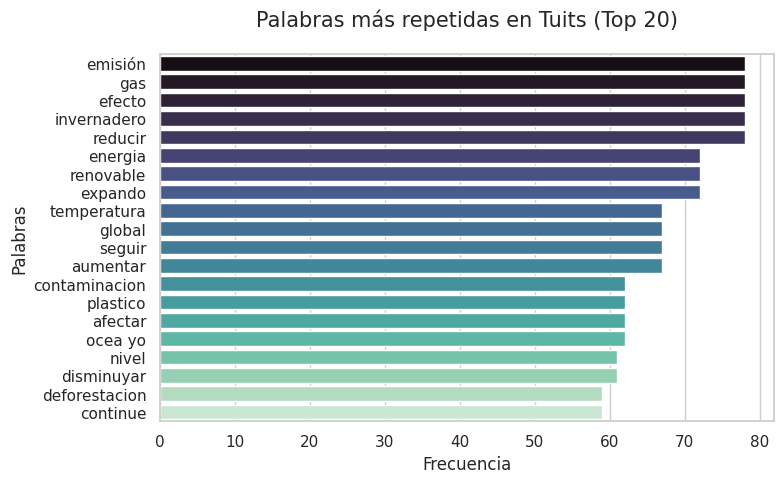

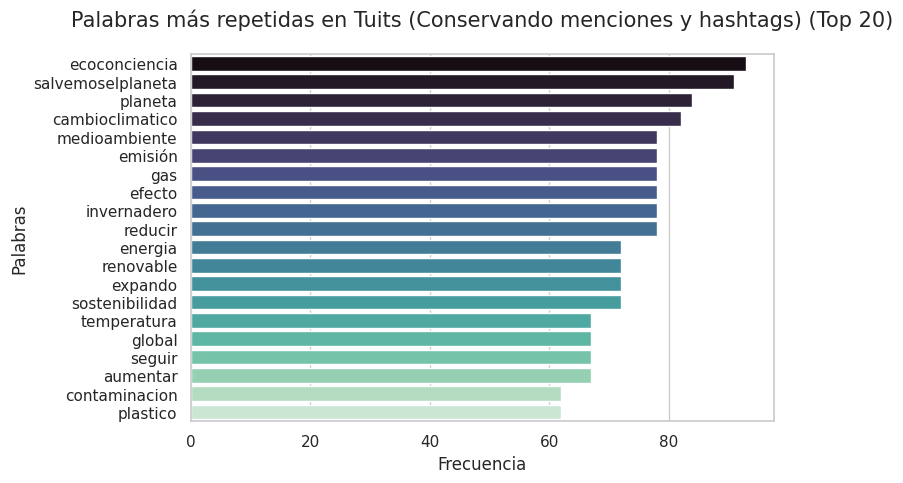

In [43]:
# Funcion
def graficar_top_palabras(dataframe, columna='tokens_lem', n_top=20, titulo='Top Palabras'):

    # Crear lista con todas la palabra de los tuits
    todas_las_palabras = [p for lista in dataframe[columna].dropna() for p in lista]

    # Contar frecuencias
    conteo = Counter(todas_las_palabras).most_common(n_top)
    df_frecuencias = pd.DataFrame(conteo, columns=['Palabra', 'Frecuencia'])

    # Grafico
    plt.figure(figsize=(8, 5))
    sns.set_theme(style="whitegrid")

    sns.barplot(
        x='Frecuencia',
        y='Palabra',
        data=df_frecuencias,
        hue='Palabra',      # Asigna color por palabra
        palette='mako',    # Paleta de colores
        legend=False  )

    # Etiquetas del grafico
    plt.title(f'{titulo} (Top {n_top})', fontsize=15, pad=20)
    plt.xlabel('Frecuencia', fontsize=12)
    plt.ylabel('Palabras', fontsize=12)
    plt.tight_layout()

    plt.show()

# -Aplicar la funcion
graficar_top_palabras(df, columna='tokens_lem', titulo='Palabras más repetidas en Tuits')
print("\n")
graficar_top_palabras(df0, columna='tokens_lem', titulo='Palabras más repetidas en Tuits (Conservando menciones y hashtags)')

# NUBE DE PALABRAS

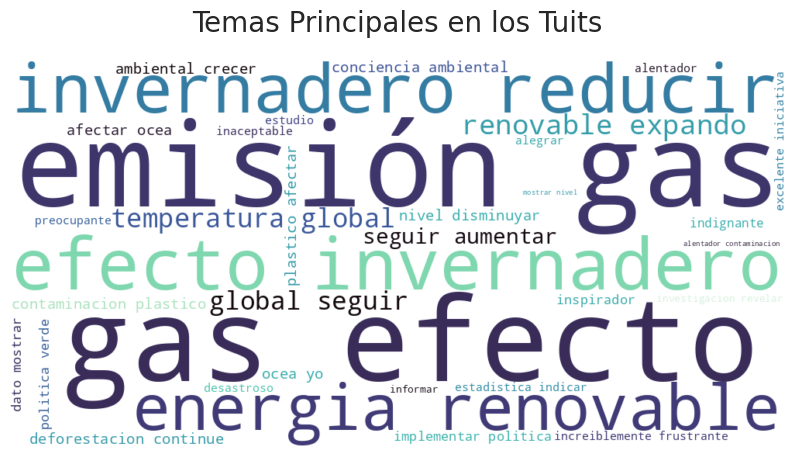

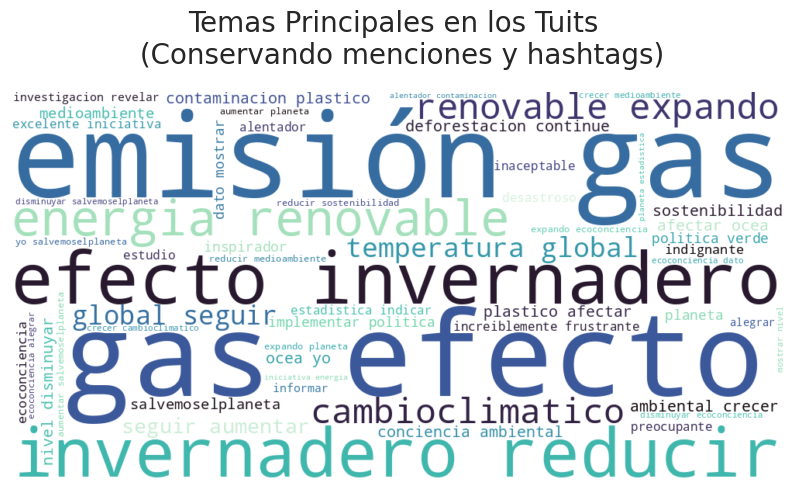

In [44]:

# Funcion
def generar_nube_palabras(dataframe, columna='tokens_lem', titulo='Nube de Palabras'):

    # Unir todos los tokens
    texto_completo = " ".join([" ".join(lista) for lista in dataframe[columna].dropna()])

    # Nube de palabras
    wordcloud = WordCloud(
        width=1000,
        height=500,
        background_color='white',
        colormap='mako',
        max_words=100,      # Número máximo de palabras a mostrar
        contour_width=1,
        contour_color='steelblue'
    ).generate(texto_completo)

    # Graficar
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Ocultar los ejes
    plt.title(titulo, fontsize=20, pad=20)
    plt.show()

# Aplicar la funcion
generar_nube_palabras(df, columna='tokens_lem', titulo='Temas Principales en los Tuits')
print("\n")
generar_nube_palabras(df0, columna='tokens_lem', titulo='Temas Principales en los Tuits \n (Conservando menciones y hashtags)')

# Graficos con datos originales (sin limpieza, lematizar, quitar stopword, emojis, etc)

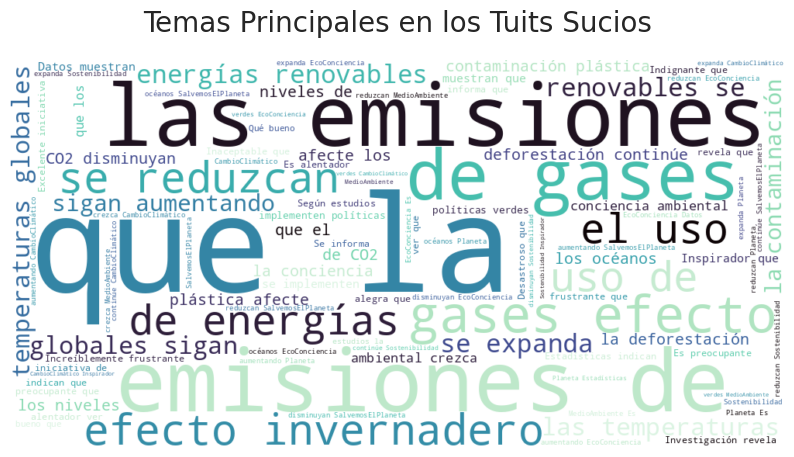

/tmp/ipython-input-1967426860.py:27: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


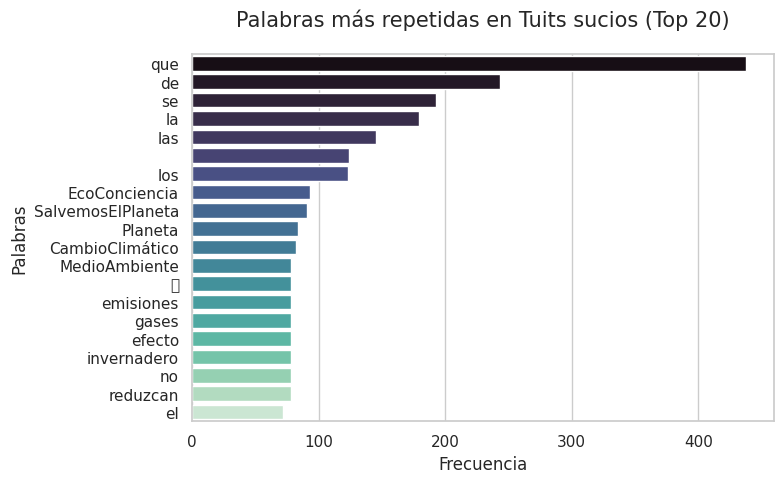

In [45]:
#Nube con palabras sin lematizar y limpiar
generar_nube_palabras(df, columna="tokens_sucios", titulo='Temas Principales en los Tuits Sucios')

print("\n")
graficar_top_palabras(df, columna='tokens_sucios', titulo='Palabras más repetidas en Tuits sucios')